### Setup

In [2]:
import numpy as np
import scipy.optimize as opt  # import root-finding algorithm
import sympy as sp  # Python toolbox for symbolic maths
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Toolbox for rendring 3D figures
from mpl_toolkits import mplot3d  # Toolbox for rendring 3D figures

In [3]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
from ipywidgets import interact
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

fig_w, fig_h = 12, 4.5
my_fontsize = 16
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': [fig_w, fig_h],
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-4,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)

In [4]:
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend.process_series()
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)


def plot_functions(function, show_derivative, show_integral):

  # For sympy we first define our symbolic variable
  x, y, z, t, f = sp.symbols('x y z t f')

  # We define our function
  if function == 'Linear':
    f = -2*t
    name = r'$-2t$'
  elif function == 'Parabolic':
    f =  t**2
    name = r'$t^2$'
  elif function == 'Exponential':
    f =  sp.exp(t)
    name = r'$e^t$'
  elif function == 'Sine':
    f =  sp.sin(t)
    name = r'$sin(t)$'
  elif function == 'Sigmoid':
    f = 1/(1 + sp.exp(-(t-5)))
    name = r'$\frac{1}{1+e^{-(t-5)}}$'

  if show_derivative and not show_integral:
    # Calculate the derivative of sin(t) as a function of t
    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    p1 = sp.plot(f, diff_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()
  elif show_integral and not show_derivative:

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)


    p1 = sp.plot(f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='g'
    p1[0].label='Function'
    p1[1].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


  elif show_integral and show_derivative:

    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)

    p1 = sp.plot(f, diff_f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[2].line_color='g'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1[2].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()

  else:

    p1 = sp.plot(f, show=False)
    p1[0].line_color='r'
    p1[0].label='Function'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


def plot_alpha_func(t, f, df_dt):

  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(t, f, 'r', label='Alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('Voltage')
  plt.title('Alpha function (f(t))')
  #plt.legend()

  plt.subplot(2,1,2)
  plt.plot(t, df_dt, 'b', label='Derivative')
  plt.title('Derivative of alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('df/dt')
  #plt.legend()


def plot_charge_transfer(t, PSP, numerical_integral):

  fig, axes = plt.subplots(1, 2)

  axes[0].plot(t, PSP)
  axes[0].set(xlabel = 't', ylabel = 'PSP')

  axes[1].plot(t, numerical_integral)
  axes[1].set(xlabel = 't', ylabel = 'Charge Transferred')

## Geometrical Understanding

In [ ]:
function_options = widgets.Dropdown(
    options=['Linear', 'Exponential', 'Sine', 'Sigmoid'],
    description='Function',
    disabled=False,
)

derivative = widgets.Checkbox(
    value=False,
    description='Show derivative',
    disabled=False,
    indent=False
)

integral = widgets.Checkbox(
    value=False,
    description='Show integral',
    disabled=False,
    indent=False
)

def on_value_change(change):
    derivative.value = False
    integral.value = False

function_options.observe(on_value_change, names='value')

interact(plot_functions, function = function_options, show_derivative = derivative, show_integral = integral);

interactive(children=(Dropdown(description='Function', options=('Linear', 'Exponential', 'Sine', 'Sigmoid'), v…

## Product Rule

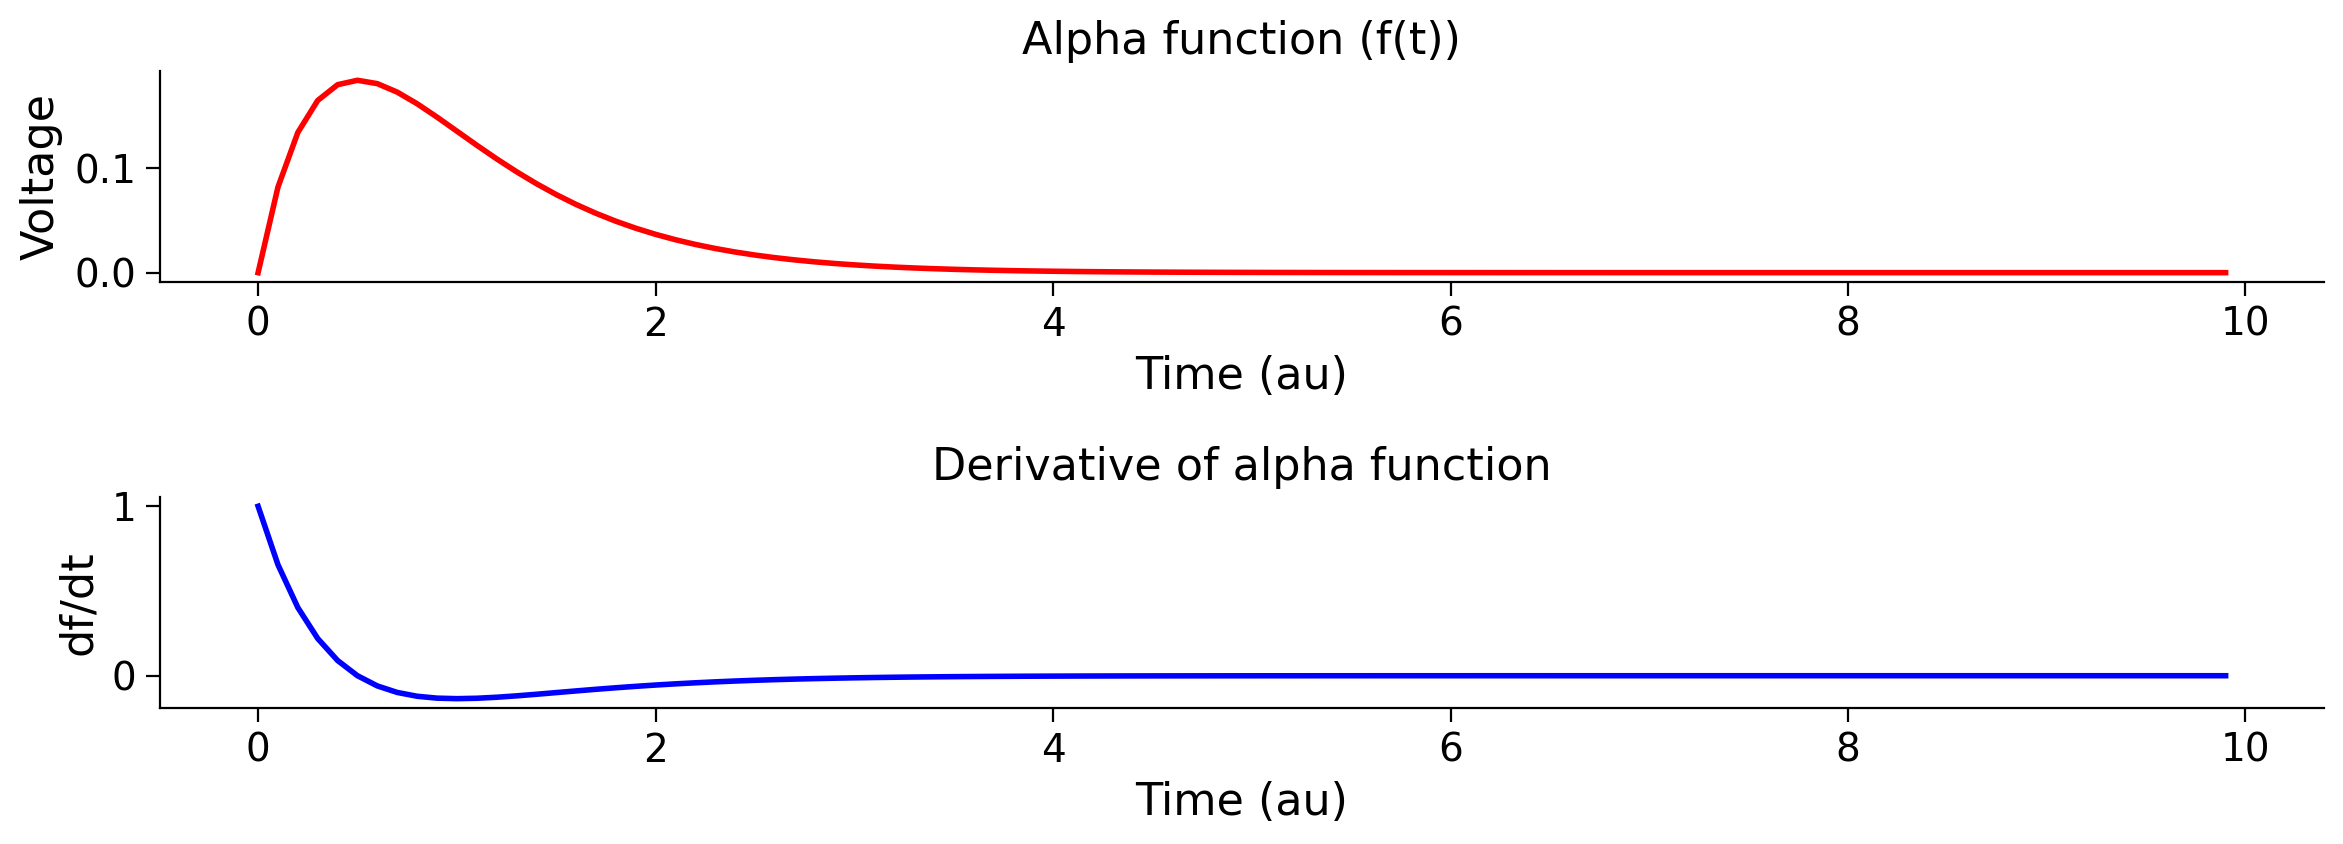

In [12]:
t = np.arange(0, 10, .1)
tau = 0.5

f = t * np.exp(-t/tau)

u_t = t
v_t = np.exp(-t/tau)

du_dt = 1
dv_dt = -1/tau * np.exp(-t/tau)

df_dt = v_t * du_dt + u_t * dv_dt

plot_alpha_func(t, f, df_dt)

## Chain Rule

In [14]:
f, t = sp.symbols("f, t")
f = 1 / (1 + sp.exp(-(t-5)))
diff_f = sp.diff(f)

f"Derivative of {f} is {diff_f}"

'Derivative of 1/(exp(5 - t) + 1) is exp(5 - t)/(exp(5 - t) + 1)**2'

### Differentiating Sine Function

In [ ]:
# @markdown *Execute this cell to enable the widget.*
def numerical_derivative_demo(h = 0.2):
  # Now lets create a sequence of numbers which change according to the sine function
  dt = 0.01
  tx = np.arange(-10, 10, dt)
  sine_fun = np.sin(tx)

  # symbolic diffrentiation tells us that the derivative of sin(t) is cos(t)
  cos_fun = np.cos(tx)

  # Numerical derivative using difference formula
  n_tx = np.arange(-10,10,h) # create new time axis
  n_sine_fun = np.sin(n_tx) # calculate the sine function on the new time axis
  sine_diff = (n_sine_fun[1:] - n_sine_fun[0:-1]) / h

  fig = plt.figure()
  ax = plt.subplot(111)
  plt.plot(tx, sine_fun, label='sine function')
  plt.plot(tx, cos_fun, label='analytical derivative of sine')

  with plt.xkcd():
    # notice that numerical derivative will have one element less
    plt.plot(n_tx[0:-1], sine_diff, label='numerical derivative of sine')
    plt.xlim([-10, 10])
    plt.xlabel('Time (au)')
    plt.ylabel('f(x) or df(x)/dt')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
              ncol=3, fancybox=True)
    plt.show()

_ = widgets.interact(numerical_derivative_demo, h = (0.01, 0.5, .02))

interactive(children=(FloatSlider(value=0.2, description='h', max=0.5, min=0.01, step=0.02), Output()), _dom_c…

## Calculating the Transfer Function and Gain of a Neuron

In [17]:
def compute_rate_and_gain(I, a, theta, current_timestep):
  """ Compute rate and gain of neuron based on parameters

  Args:
    I (ndarray): different possible values of the current
    a (scalar): parameter of the transfer function
    theta (scalar): parameter of the transfer function
    current_timestep (scalar): the time we're using to take steps

  Returns:
    (ndarray, ndarray): rate and gain for each possible value of I
  """

  # Compute rate
  rate = (1+np.exp(-a*(I-theta)))**-1 - (1+np.exp(a*theta))**-1

  # Compute gain using a numerical derivative
  gain = (rate[1:] - rate[0:-1])/current_timestep

  return rate, gain

In [16]:
def plot_rate_and_gain(a, theta, I_mean):

  current_timestep = 0.1

  # Compute I
  I = np.arange(0, 8, current_timestep)

  rate, gain = compute_rate_and_gain(I, a, theta, current_timestep)
  I_1 = I_mean - current_timestep/2
  rate_1 = (1+np.exp(-a*(I_1-theta)))**-1 - (1+np.exp(a*theta))**-1
  I_2 = I_mean + current_timestep/2
  rate_2 = (1+np.exp(-a*(I_2-theta)))**-1 - (1+np.exp(a*theta))**-1

  input_range = I_2-I_1
  output_range = rate_2 - rate_1

  # Visualize rate and gain
  plt.subplot(1,2,1)
  plt.plot(I,rate)
  plt.plot([I_1,I_1],[0, rate_1],color='r')
  plt.plot([0,I_1],[rate_1, rate_1],color='b')
  plt.plot([I_2,I_2],[0, rate_2],color='r')
  plt.plot([0,I_2],[rate_2, rate_2],color='b')
  plt.xlim([0, 8])
  low, high = plt.ylim()
  plt.ylim([0, high])

  plt.xlabel('Injected current (au)')
  plt.ylabel('Output firing rate (normalized)')
  plt.title('Transfer function')

  plt.text(2, 1.3, 'Output-Input Ratio =' + str(np.round(1000*output_range/input_range)/1000), style='italic',
      bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
  plt.subplot(1,2,2)
  plt.plot(I[0:-1], gain)
  plt.plot([I_mean, I_mean],[0,0.6],color='r')
  plt.xlabel('Injected current (au)')
  plt.ylabel('Gain')
  plt.title('Gain')
  plt.xlim([0, 8])
  low, high = plt.ylim()
  plt.ylim([0, high])

_ = widgets.interact(plot_rate_and_gain, a = (0.5, 2.0, .02), theta=(1.2,4.0,0.1), I_mean= (0.5,8.0,0.1))

interactive(children=(FloatSlider(value=1.24, description='a', max=2.0, min=0.5, step=0.02), FloatSlider(value…